# ACTIVIDAD 3 - ESTRUCTURANDO PROYECTO DE DS
### PROMEDIO SEMANAL POR LAS 3 PRIMERAS SEMANAS EL MES DE MARZO
### FUENTE: PRONÓSTICOS OFICIALES SEGÚN XM
*Estudiante: Juan Sebastian Mora Tibamoso*

*Contacto : sebastian.mt99@gmail.com*

#### *Pregúntas de Interés*
##### 1)¿En que horario se presenta el mayor consumo de energía?
##### 2)¿Que sector es el que mas presenta consumo de energia?
##### 3)¿Son diferentes los horarios de consumo de una gran Región a un pequeña?

In [4]:
#se importan librerías de posible uso
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
# importando el archivo csv 
url="https://raw.githubusercontent.com/JSEB99/bootcamp_DS_BIT/main/pronosticos_consumo_semanal.csv"
dataset=pd.read_csv(url,sep=',')
# Conozco que campos contiene el dataframe
dataset.head(1)

,Operadores_de_red,hora,potencia,lunes,martes,miercoles,jueves,viernes,sabado,domingo
0,MC-Antioquia,1,EN,883.0,923.0,924.0,921.0,938.0,956.0,907.0


In [33]:
#Visualizo que operadores de red existen con su longitud
operators_list=dataset['Operadores_de_red'].unique()
print(operators_list,len(operators_list))


['MC-Antioquia' 'MC-Arauca' 'MC-Atlantico' 'MC-BajoPutumayo' 'MC-Bolivar'
 'MC-Boyaca' 'MC-Caldas' 'MC-Cali' 'MC-Caqueta' 'MC-Cartago' 'MC-Casanare'
 'MC-Cauca' 'MC-Celsia' 'MC-Cerromatoso' 'MC-Cesar' 'MC-Choco'
 'MC-CiraInfanta' 'MC-Codensa' 'MC-CordobaSucre' 'MC-Drummond'
 'MC-DrummondLoma' 'MC-Emec' 'MC-GM' 'MC-Guaviare' 'MC-Huila'
 'MC-Intercor' 'MC-Meta' 'MC-Nariño' 'MC-NorSantander' 'MC-Oxy'
 'MC-Pereira' 'MC-Planeta' 'MC-PSTN' 'MC-Putumayo' 'MC-Quindio'
 'MC-Rubiales' 'MC-SanFernando' 'MC-Santander' 'MC-Tolima'
 'MC-TubosCaribe' 'MC-Tulua'] 41


In [87]:
# Elimino campo innecesario
dataset_sin_potencia=dataset.drop('potencia',axis='columns')
# promedio segun hora
dataset_horario = dataset.groupby(['Operadores_de_red','hora']).mean(numeric_only=True)
# agrego columna de promedio en semana segun hora
dataset_horario['promedio_semanal']=dataset_horario.mean(axis=1)
# averiguo hora maxima de consumo según consumo
dataset_hora_max = dataset_horario.reset_index()
dataset_hora_max_2 = dataset_hora_max[['Operadores_de_red','promedio_semanal']].groupby('Operadores_de_red').max()
# intersección entre los dataset para averiguar la hora en que se produjo el consumo máximo
dataset_max = pd.merge(dataset_hora_max,dataset_hora_max_2,how='inner',on = 'promedio_semanal')
# agrego columna para gráficar resultados
dataset_max['Operador/Hora'] = dataset_max['Operadores_de_red']+'/'+dataset_max['hora'].astype(str)
dataset_max

,Operadores_de_red,hora,lunes,martes,miercoles,jueves,viernes,sabado,domingo,promedio_semanal,Operador/Hora
0,MC-Antioquia,20,1529.333333,1534.666667,1525.000000,1529.000000,1525.666667,1413.333333,1280.333333,1476.761905,MC-Antioquia/20
1,MC-Arauca,20,41.918683,41.839082,41.905701,41.803414,42.326769,40.529729,40.117073,41.491493,MC-Arauca/20
2,MC-Atlantico,21,757.766667,757.500000,754.033333,768.400000,762.600000,726.733333,703.800000,747.261905,MC-Atlantico/21
3,MC-BajoPutumayo,20,13.674959,14.011765,14.275395,14.132634,14.195226,14.297570,13.204801,13.970336,MC-BajoPutumayo/20
4,MC-Bolivar,21,460.320981,453.277504,466.308734,460.430912,462.619446,444.448153,416.224948,451.947240,MC-Bolivar/21
5,MC-Boyaca,20,306.224273,311.779176,313.411353,321.238983,317.601580,307.654748,284.293342,308.886208,MC-Boyaca/20
6,MC-Caldas,20,252.333333,249.333333,249.000000,252.666667,250.666667,239.333333,219.666667,244.714286,MC-Caldas/20
7,MC-Cali,13,579.284125,578.800062,579.511593,572.919370,578.814853,528.195506,413.204395,547.247129,MC-Cali/13
8,MC-Caqueta,20,47.133126,47.030438,47.805251,46.632398,46.621468,45.266666,44.505830,46.427882,MC-Caqueta/20
9,MC-Cartago,20,30.024721,29.907520,29.873849,29.665196,29.323626,28.225089,23.965760,28.712252,MC-Cartago/20


[Text(0.5, 1.0, 'Hora de mas consumo según regiones'),
 Text(0.5, 0, 'Regiones/Hora'),
 Text(0, 0.5, 'Potencia (MW)')]

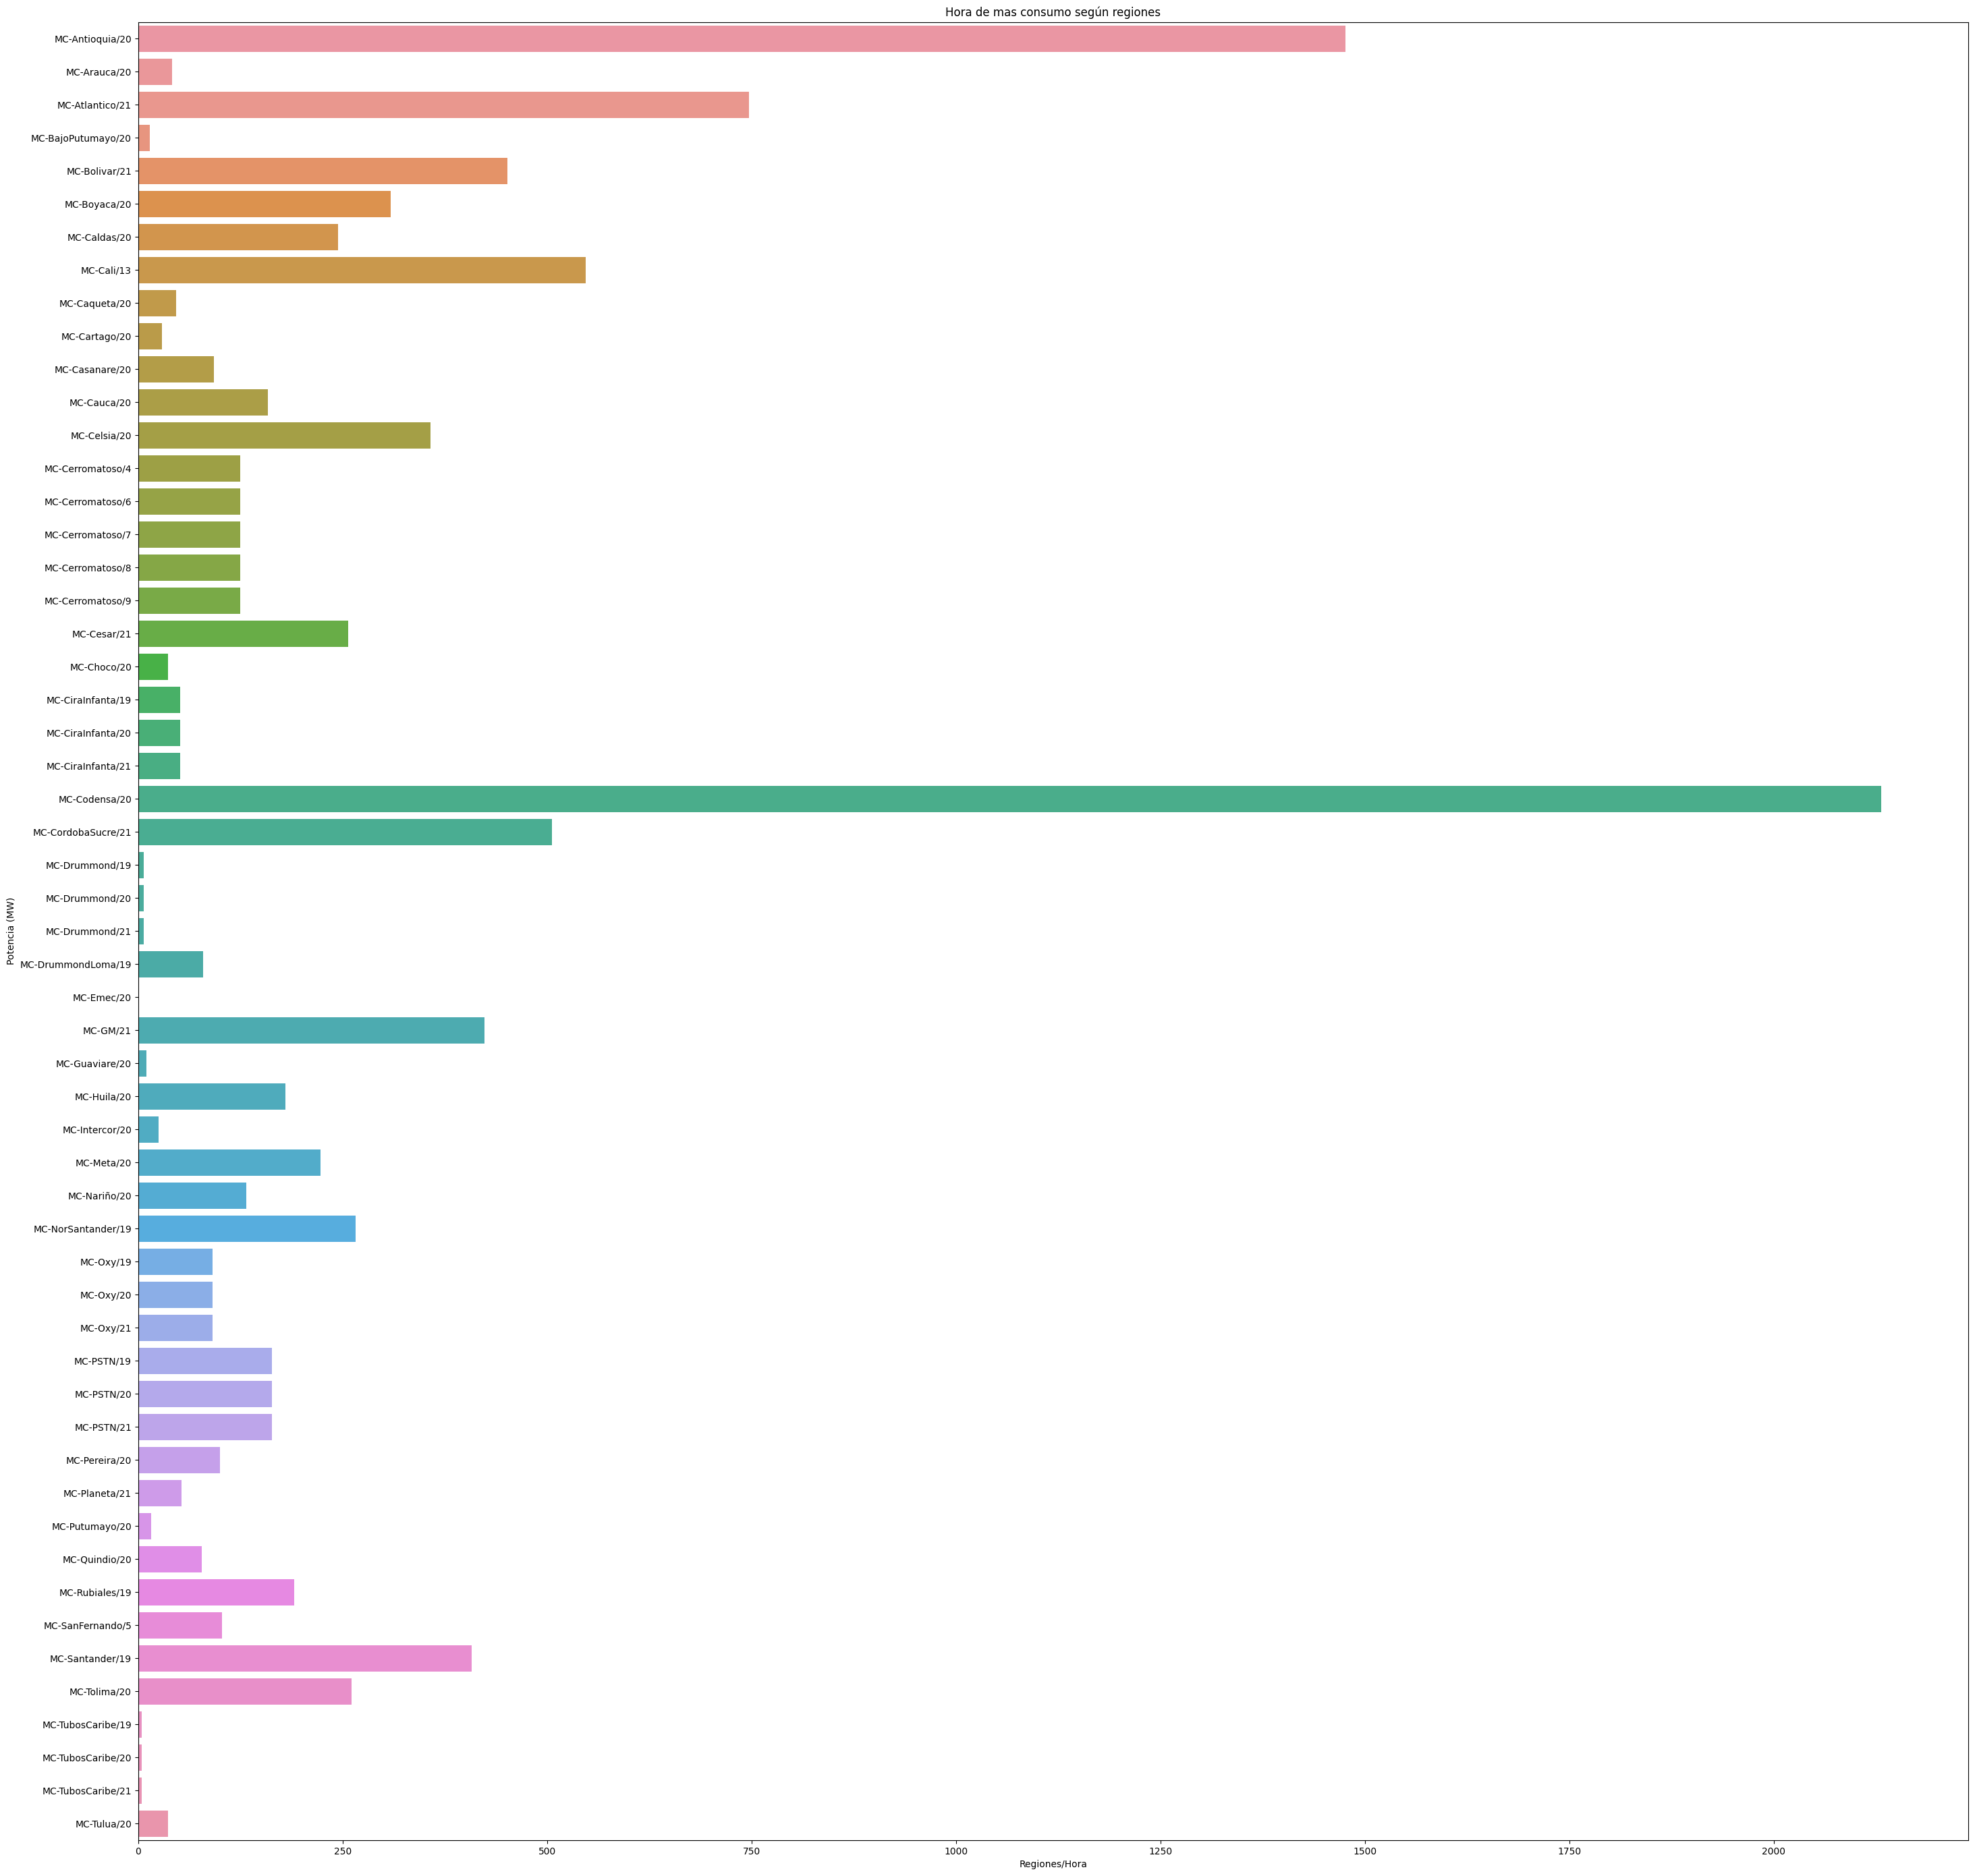

In [92]:
# Grafico general
fig, ax = plt.subplots(figsize=(35,35))
sns.barplot(y="Operador/Hora",x="promedio_semanal",data=dataset_max,dodge=False,ax=ax).set(title='Hora de mas consumo según regiones',xlabel='Regiones/Hora',ylabel='Potencia (MW)')

[Text(0.5, 1.0, 'Hora de mas consumo según regiones'),
 Text(0.5, 0, 'Hora'),
 Text(0, 0.5, 'Operadores de red')]

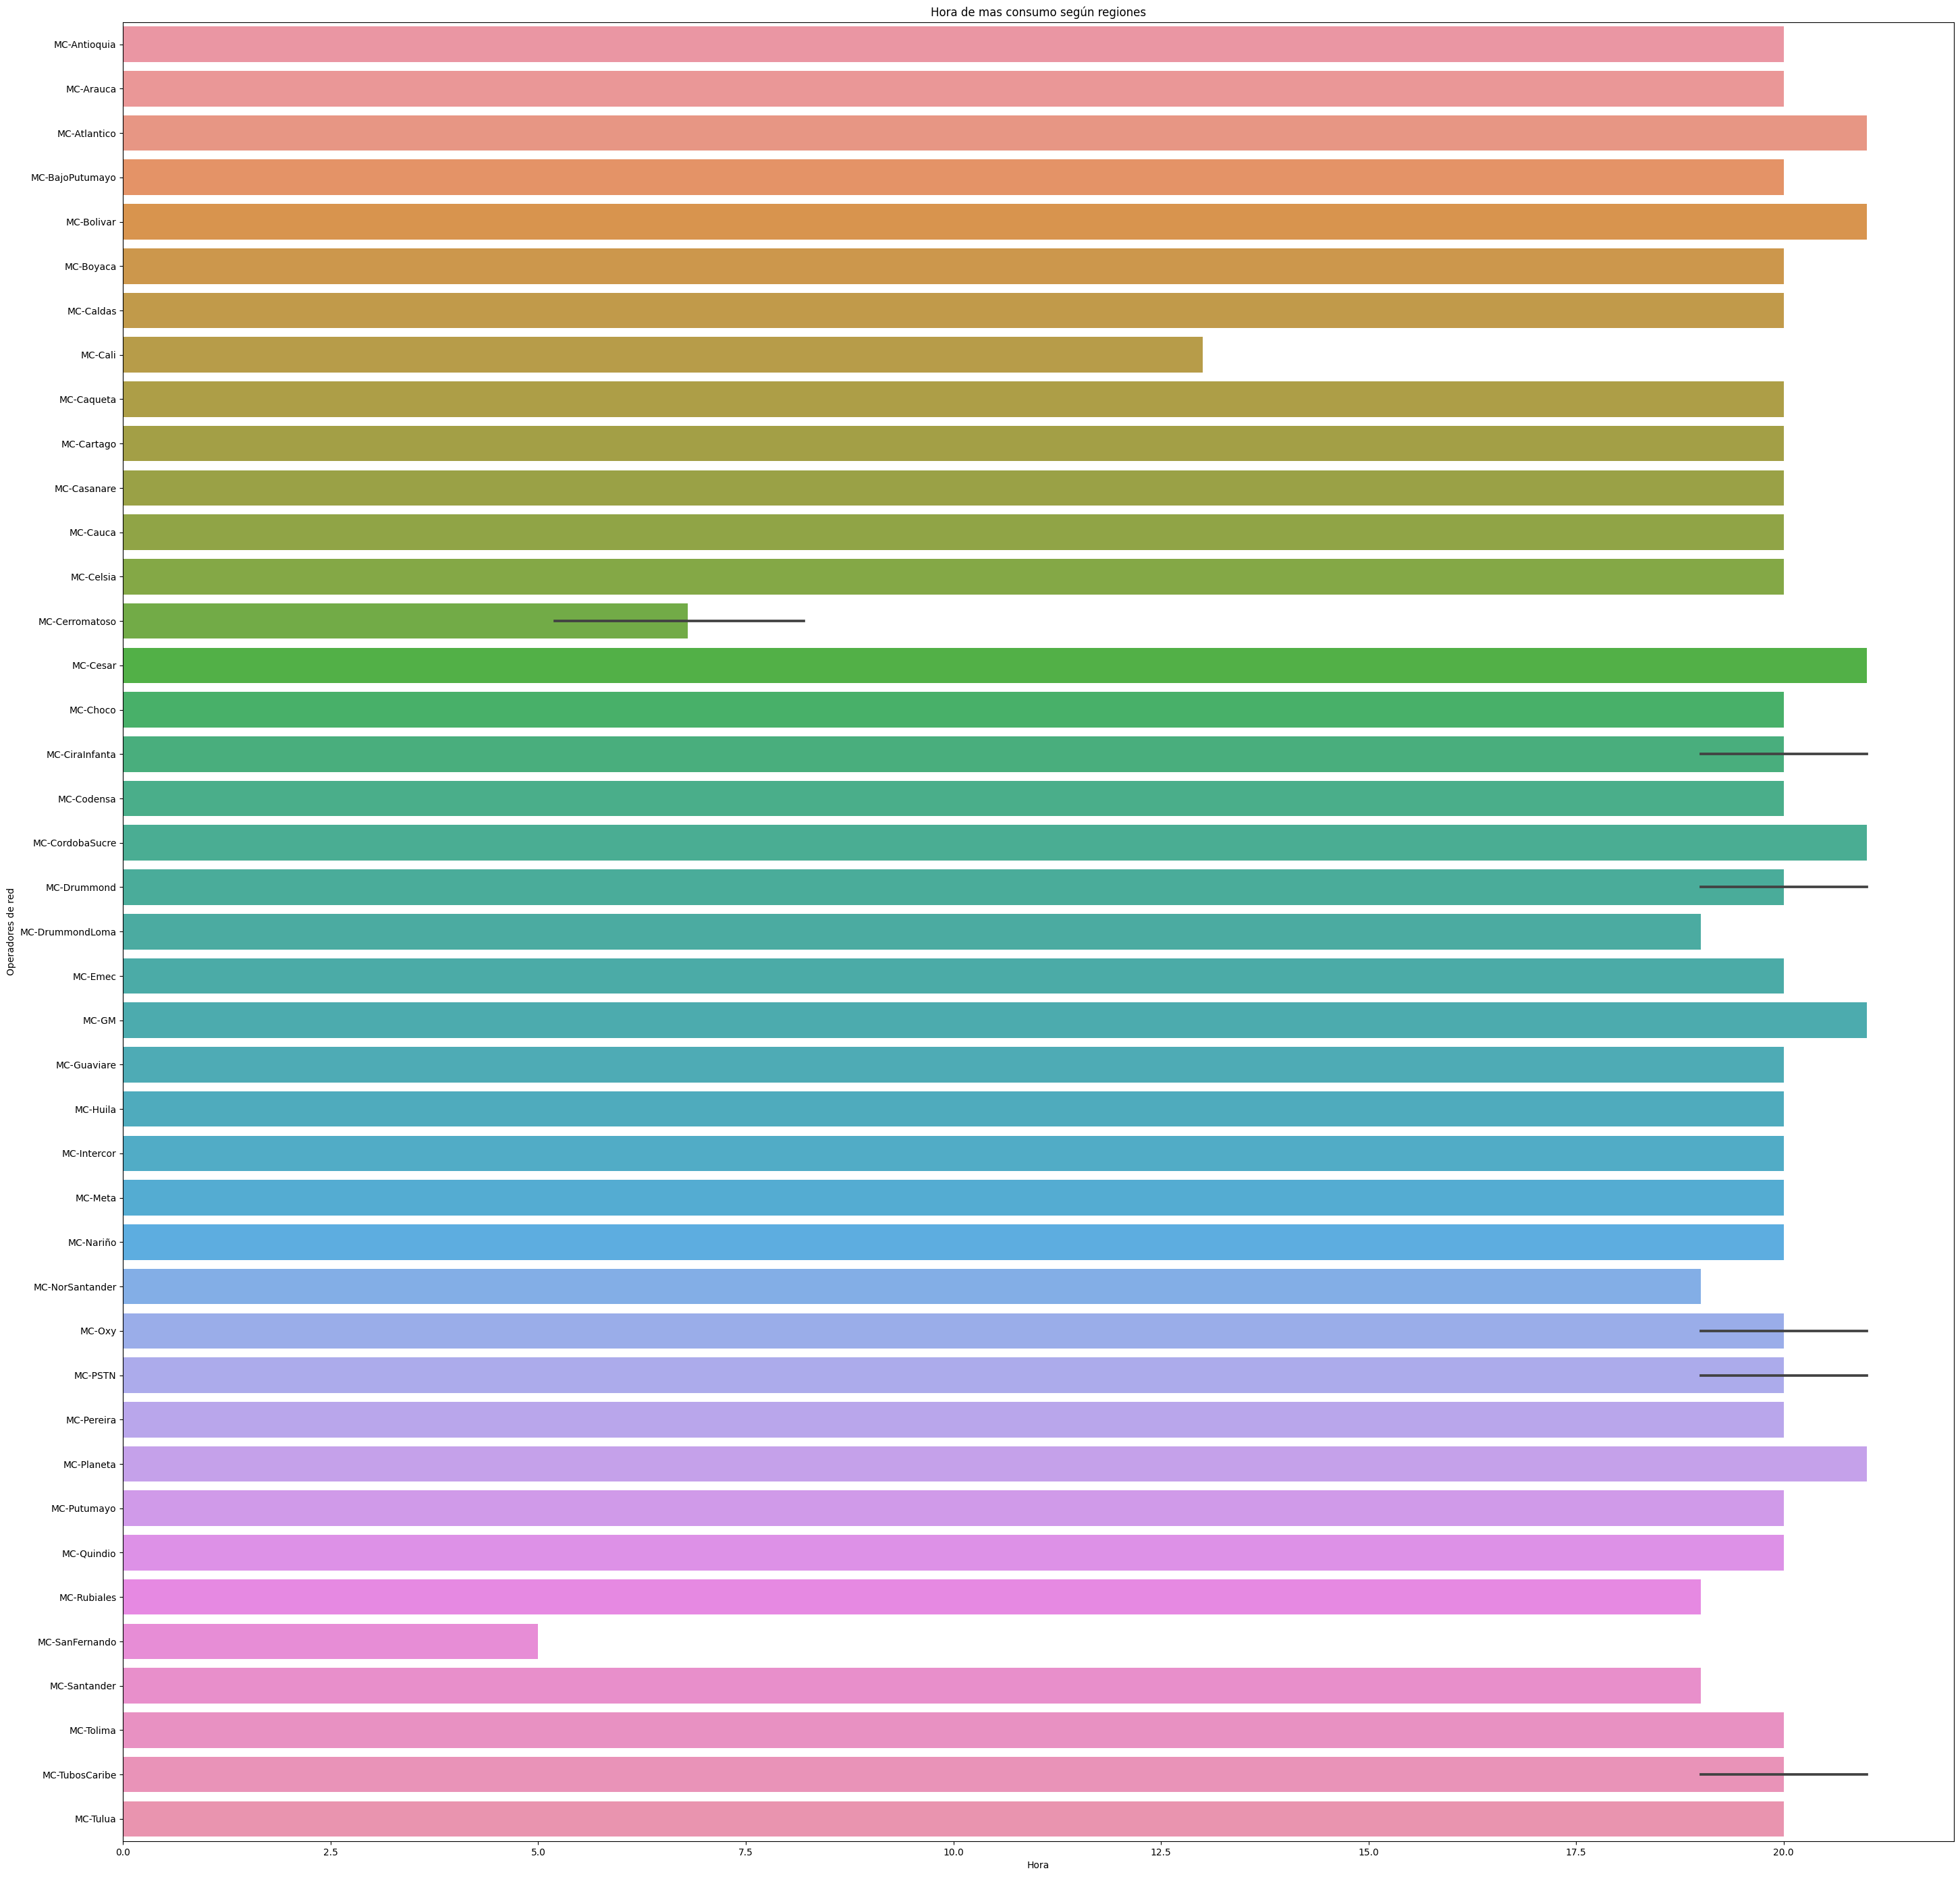

In [93]:
fig2, ax2 = plt.subplots(figsize=(35,35))
sns.barplot(y="Operadores_de_red",x="hora",data=dataset_max,dodge=False,ax=ax2).set(title='Hora de mas consumo según regiones',xlabel='Hora',ylabel='Operadores de red')

In [98]:
# El promedio total es:
from math import trunc
hora_promedio_mas_consumo = dataset_max['hora'].mean()
hora_prom = trunc(hora_promedio_mas_consumo)
minutos_prom = trunc((hora_promedio_mas_consumo-hora_prom)*60)
print(f"Hora promedio de más consumo según dataset: {hora_prom}:{minutos_prom} h")

Hora promedio de más consumo según dataset: 18:26 h


#### ANÁLISIS Y CONCLUSIÓNES **********************************************************************************************
Según los análisis presentados se evidencia que la hora de más consumo en el País durante las primeras semanas se evidencia que la hora de más consumo en promedio son las 18:26, según dicho dato se puede concluir que el horario de la tarde/noche según el grafico de barras anterior es donde las personas tienden a consumir más, esto indica que a pesar de que las industrias tiendan a requerir mas energía que una vivienda familiar, si se tienen muchas viviendas conectandose a dichas horas se presentará un mayor consumo energético. Donde en la mayoria de las regiones se presentan horarios sobre las 20:00, indicando que al necesitar de mayor uso de luces, aparatos de entretenimiento/ trabajo y por el reciente aumento de vida virtual el consumo en horarios nocturnos es mayor que en el transcurso del día para la mayoria de las regiones.
Sin embargo a pesar de que el consumo es mayor en horas nocturnas, revisando el gráfico en ciertas zonas no se presento dicho caso, donde para 3 regiones se presentó en horas de la madrugada, mañana y medio día. Lo cual puede suponerse como falta de recurso energético por ciertos horarios, tienen una zona industrial mucho mas grande que las zonas urbanas o son zonas con grandes zonas rurales donde la forma de vida de las personas no este tan adaptada a la digitalización.

#### *RESPUESTAS A PREGUNTAS*
1 -> **18:26 h**

2 -> **Sector urbano** (Incluyendo al consumo de las personas en transporte, entretenimiento, etc.). Para definirse un sector mas preciso se necesita mas información

3 -> **No**. Sin embargo, se pueden presentar ciertas excepciones las cuales necesitan mayor información para generarse una solución clara.